In [1]:
#Installing the adjustText library
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=d83710ac2c0424c39fdba0f094c84bb3c25f0356350fdf9e39a12ac187fbd3c4
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [2]:
# Data from here:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

In [3]:
# READ, RENAME
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
# REPLACED WITH THE CODE BELOW THAT EXTRACTS THE LATEST .xlsx FILE IN THE FOLDER

# list_of_files = glob.glob('C:\\Users\\nikan\\Desktop\\COVID_daily/*xlsx') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)
# print(latest_file)
# covid = pd.read_excel(latest_file) 

covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

In [4]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
# covid_daily_per_continent

In [5]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
# covid_daily_per_continent_cumulative

In [6]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
# covid_daily_global

In [7]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
# covid_daily_global_cumulative

In [8]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

In [9]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

In [10]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()
# last_day_covid

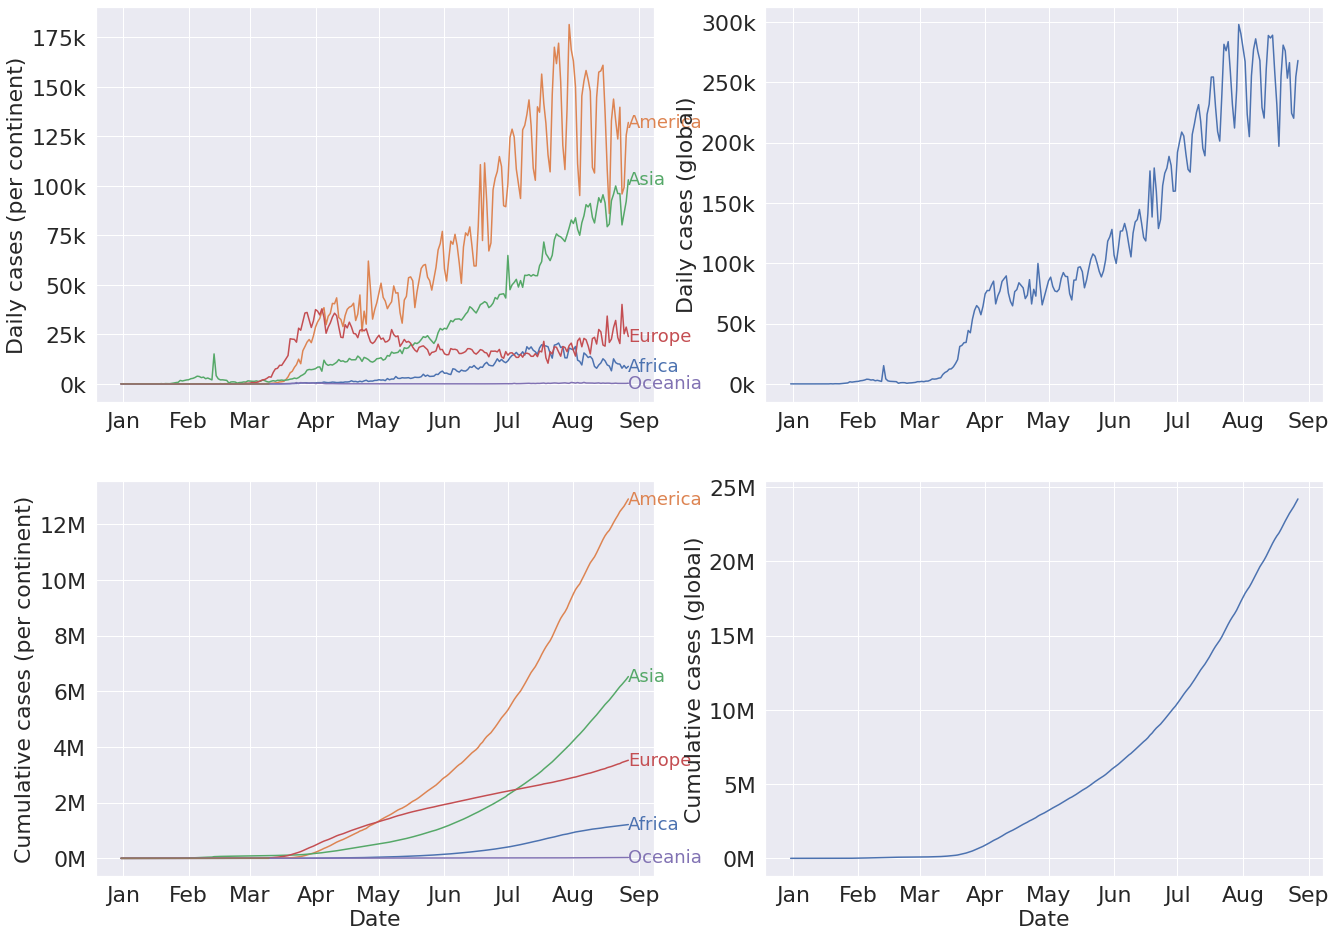

In [11]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('covid_h_Infection_rate_per_continent.png')

-----------------------NEW CODE STARTS HERE----------------------------------------

##-----------------Analysis for Cases---------------------------------

In [12]:
#Segregating the covid_daily_per_continent dataframe according to the continents for ease of applying pd.rolling function
cv = covid_daily_per_continent.groupby('Continent')
cv1 = cv.get_group('Africa')
cv2 = cv.get_group('America')
cv3 = cv.get_group('Asia')
cv4 = cv.get_group('Europe')
cv5 = cv.get_group('Oceania')

In [13]:
#Applying pd.rolling function to the above formed dataframes 
cv1['MA_cases'] = cv1['Cases'].rolling(window=7).mean()
cv2['MA_cases'] = cv2['Cases'].rolling(window=7).mean()
cv3['MA_cases'] = cv3['Cases'].rolling(window=7).mean()
cv4['MA_cases'] = cv4['Cases'].rolling(window=7).mean()
cv5['MA_cases'] = cv5['Cases'].rolling(window=7).mean()

#Applying pd.rolling function to covid_daily_global dataframe for smoothing the cases
covid_daily_global['MA_cases'] = covid_daily_global['Cases'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [14]:
#Segregating the covid_daily_per_continent_cumulative dataframe according to the continents for ease of applying pd.rolling function
cv6 = covid_daily_per_continent_cumulative.groupby('Continent')
cv7 = cv6.get_group('Africa')
cv8 = cv6.get_group('America')
cv9 = cv6.get_group('Asia')
cv10 = cv6.get_group('Europe')
cv11= cv6.get_group('Oceania')

In [15]:
#Applying pd.rolling function to the above formed dataframes 
cv7['MA_cases'] = cv7['Cases'].rolling(window=7).mean()
cv8['MA_cases'] = cv8['Cases'].rolling(window=7).mean()
cv9['MA_cases'] = cv9['Cases'].rolling(window=7).mean()
cv10['MA_cases'] = cv10['Cases'].rolling(window=7).mean()
cv11['MA_cases'] = cv11['Cases'].rolling(window=7).mean()

#Applying pd.rolling function to covid_daily_global_cumulative dataframe for smoothing the cases
covid_daily_global_cumulative['MA_cases'] = covid_daily_global_cumulative['Cases'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

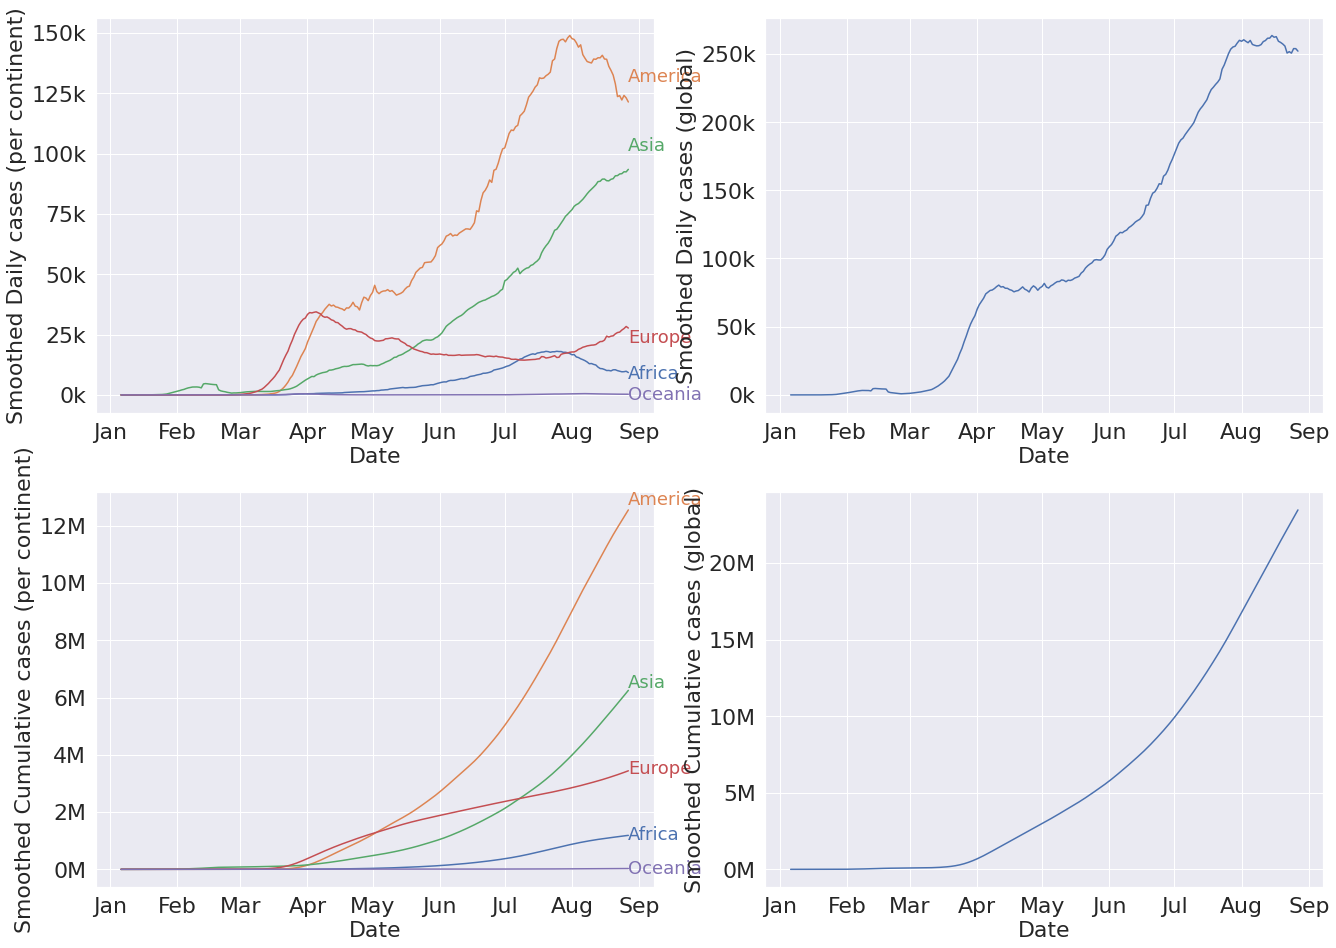

In [23]:
#Plotting the smoothed MA graphs for the 'Cases' analysis done above
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="MA_cases",data=cv1, markers=True, legend=False,ax=axes[0, 0]) #, hue_order=countries_1_5
ax1 = sns.lineplot(x="DateRep", y="MA_cases",data=cv2, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_cases",data=cv3, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_cases",data=cv4, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_cases",data=cv5, markers=True, legend=False,ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[0, 0].set_ylabel("Smoothed Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("Date",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="MA_cases", data=cv7, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_cases", data=cv8, markers=True, legend=False,ax=axes[1,0]) 
ax2 = sns.lineplot(x="DateRep", y="MA_cases", data=cv9, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_cases", data=cv10, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_cases", data=cv11, markers=True, legend=False,ax=axes[1,0])
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1,0].set_ylabel("Smoothed Cumulative cases (per continent)",fontsize=22)
axes[1,0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="MA_cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0,1]) 
axes[0,1].set_ylabel("Smoothed Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("Date",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="MA_cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Smoothed Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Choudhary_Shreyas.png')

##---------------------Analysis for Deaths--------------------------

In [17]:
#Segregating the covid_daily_per_continent dataframe according to the continents for ease of applying pd.rolling function
cv12 = cv.get_group('Africa')
cv13 = cv.get_group('America')
cv14 = cv.get_group('Asia')
cv15 = cv.get_group('Europe')
cv16 = cv.get_group('Oceania')

In [18]:
#Applying pd.rolling function to the above formed dataframes 
cv12['MA_deaths'] = cv12['Deaths'].rolling(window=7).mean()
cv13['MA_deaths'] = cv13['Deaths'].rolling(window=7).mean()
cv14['MA_deaths'] = cv14['Deaths'].rolling(window=7).mean()
cv15['MA_deaths'] = cv15['Deaths'].rolling(window=7).mean()
cv16['MA_deaths'] = cv16['Deaths'].rolling(window=7).mean()

#Applying pd.rolling function to covid_daily_global dataframe for smoothing the cases
covid_daily_global['MA_deaths'] = covid_daily_global['Deaths'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [19]:
#Segregating the covid_daily_per_continent_cumulative dataframe according to the continents for ease of applying pd.rolling function
cv17 = cv6.get_group('Africa')
cv18 = cv6.get_group('America')
cv19 = cv6.get_group('Asia')
cv20 = cv6.get_group('Europe')
cv21= cv6.get_group('Oceania')

In [20]:
#Applying pd.rolling function to the above formed dataframes 
cv17['MA_deaths'] = cv17['Deaths'].rolling(window=7).mean()
cv18['MA_deaths'] = cv18['Deaths'].rolling(window=7).mean()
cv19['MA_deaths'] = cv19['Deaths'].rolling(window=7).mean()
cv20['MA_deaths'] = cv20['Deaths'].rolling(window=7).mean()
cv21['MA_deaths'] = cv21['Deaths'].rolling(window=7).mean()

#Applying pd.rolling function to covid_daily_global_cumulative dataframe for smoothing the cases
covid_daily_global_cumulative['MA_deaths'] = covid_daily_global_cumulative['Deaths'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

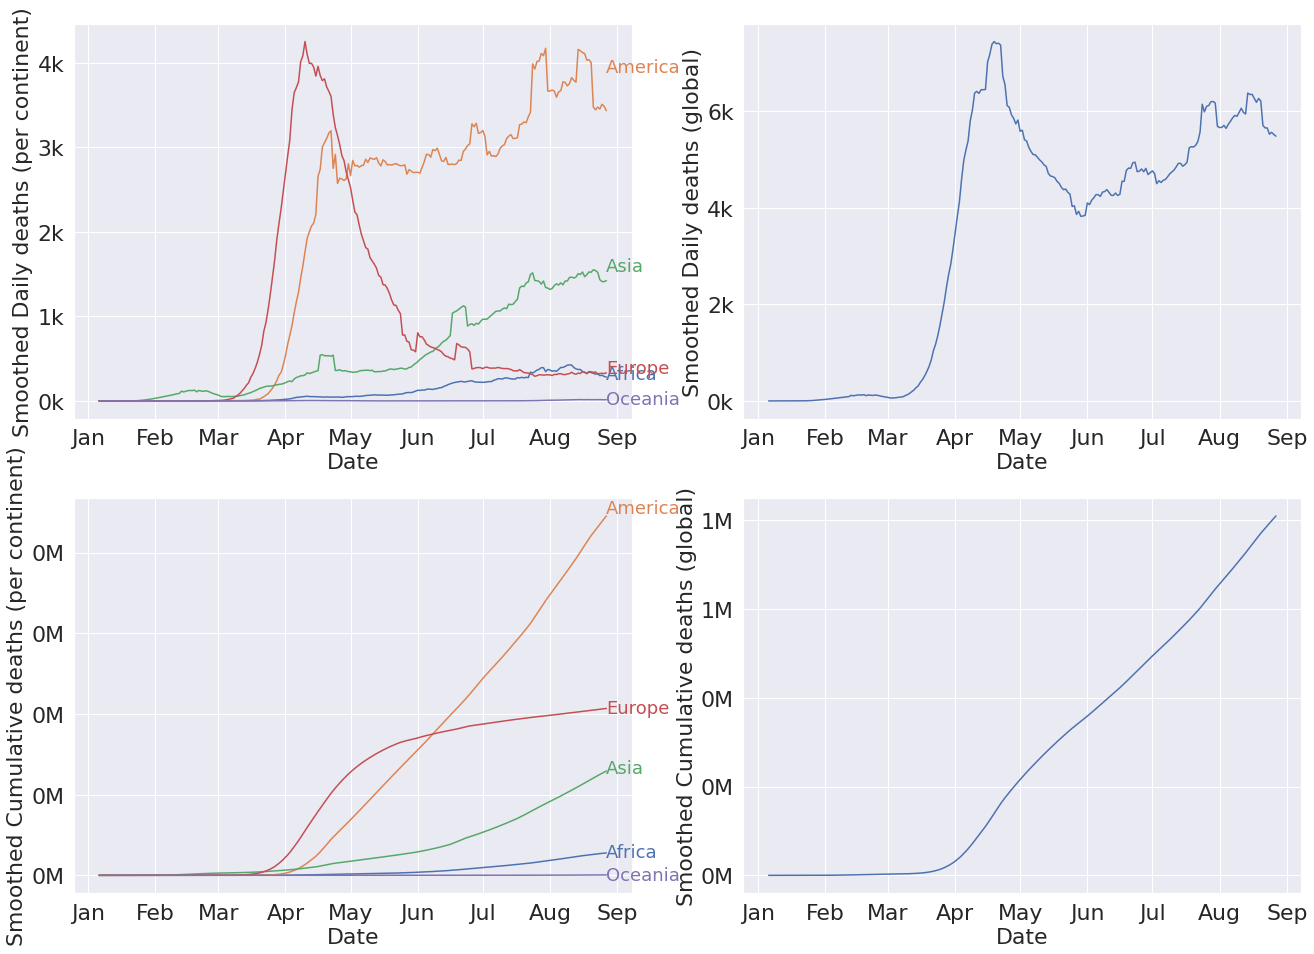

In [24]:
#Plotting the smoothed MA graphs for the 'Deaths' analysis done above
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="MA_deaths",data=cv12, markers=True, legend=False,ax=axes[0, 0]) #, hue_order=countries_1_5
ax1 = sns.lineplot(x="DateRep", y="MA_deaths",data=cv13, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_deaths",data=cv14, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_deaths",data=cv15, markers=True, legend=False,ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="MA_deaths",data=cv16, markers=True, legend=False,ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[0, 0].set_ylabel("Smoothed Daily deaths (per continent)",fontsize=22)
axes[0, 0].set_xlabel("Date",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="MA_deaths", data=cv17, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_deaths", data=cv18, markers=True, legend=False,ax=axes[1,0]) 
ax2 = sns.lineplot(x="DateRep", y="MA_deaths", data=cv19, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_deaths", data=cv20, markers=True, legend=False,ax=axes[1,0])
ax2 = sns.lineplot(x="DateRep", y="MA_deaths", data=cv21, markers=True, legend=False,ax=axes[1,0])
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1,0].set_ylabel("Smoothed Cumulative cases (per continent)",fontsize=22)
axes[1,0].set_ylabel("Smoothed Cumulative deaths (per continent)",fontsize=22)
axes[1,0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="MA_deaths", data=covid_daily_global, markers=True, legend=False, ax=axes[0,1]) 
axes[0,1].set_ylabel("Smoothed Daily deaths (global)",fontsize=22)
axes[0,1].set_xlabel("Date",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="MA_deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Smoothed Cumulative deaths (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Choudhary_Shreyas.png')